In [190]:
import cv2
import serial
import time
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline

(240, 320)

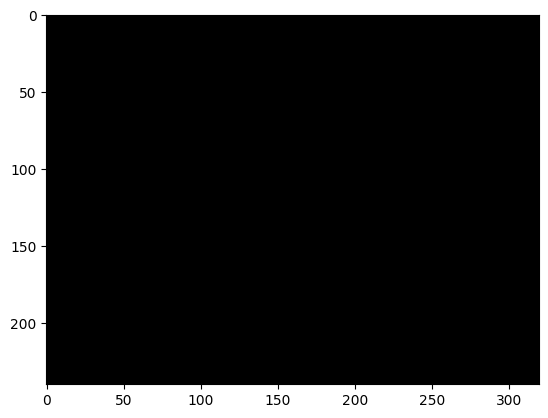

In [191]:
img1=np.zeros((240,320),dtype=np.uint8)

plt.imshow(img1,'gray')
img1.shape

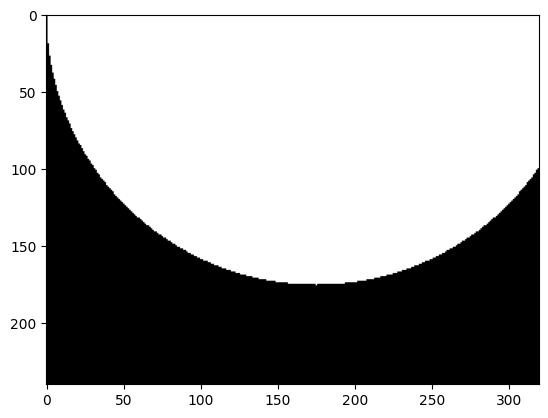

In [192]:
x = 175
y = 0
r = 175

img2=cv2.circle(img1,(x,y),r,(255,255,255),-1)

plt.imshow(img2,'gray')

In [193]:
def creat_line (x):
    img=np.zeros((240,320),dtype=np.uint8)
    angle_radian=np.deg2rad(x)
    end_point_x= int(175 - 440*np.cos(angle_radian))
    end_point_y=int(0 + 440*np.sin(angle_radian))
    img_line = cv2.line(img, (175,0),(end_point_x,end_point_y),(255,255,255),1)
    return img_line

In [194]:
img_45=creat_line(45)

img_90=creat_line(90)

img_135=creat_line(135)


In [195]:
img45=cv2.bitwise_and(img2,img_45)

img90=cv2.bitwise_and(img2,img_90)

img135=cv2.bitwise_and(img2,img_135)


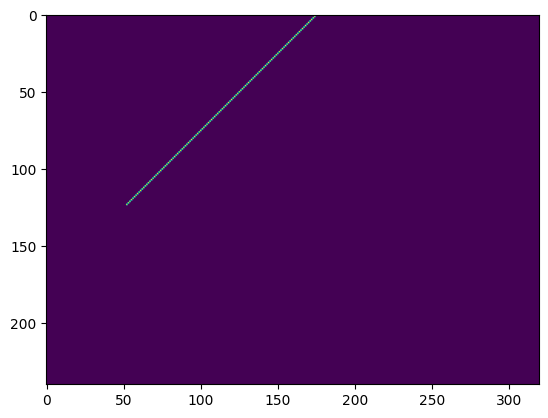

In [196]:
plt.imshow(img45)

In [197]:
def count_pixel (img):
    return np.count_nonzero(img)

In [198]:


def vitri(x):
    if x == 1:
        return 1
    if x ==2:
        return 2
    if x== 3:
        return 3
   


In [199]:
DataSerial = serial.Serial('COM9',9600)
time.sleep(2)
def input_Arduino(data):
    DataSerial.write(data.encode()) 


In [200]:
url = 'http://192.168.1.36/cam-lo.jpg'


# Create a VideoCapture object
cap = cv2.VideoCapture(url)

# Check if the IP camera stream is opened successfullya
if not cap.isOpened():
    print("Failed to open the IP camera stream")
    exit()

# Read and display video frames
while True:
    # Read a frame from the video stream
    input_Arduino("goc")
    time.sleep(4)
    img_resp = urllib.request.urlopen(url)
    imgnp = np.array(bytearray(img_resp.read()), dtype=np.uint8)
    # ret, frame = cap.read()
    img = cv2.imdecode(imgnp, -1)

    

    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    a,result = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    result_45=cv2.bitwise_and(result,img45)
    result_90=cv2.bitwise_and(result,img90)
    result_135=cv2.bitwise_and(result,img135)

    max_value = 0
    dem = 0
    x1=count_pixel(result_45)
    x2=count_pixel(result_90)
    x3=count_pixel(result_135)
    
    f =[x1,x2,x3]
    for i in f:
        if i>max_value:
            max_value=i
            dem = dem+1
    a = vitri(dem)
    data = str(a)
    input_Arduino(data)
    print(data)
    time.sleep(5)
    
    




2
2
2
2


KeyboardInterrupt: 

In [ ]:
DataSerial.close()